In [1]:
#Step1. Read the dataset

import pandas as pd
import numpy as np

iris = pd.read_csv('iris.csv')  # Read iris file
iris.iloc[[1,51,101]]           # Demonstrate the representative of three species

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,4.9,3.0,1.4,0.2,setosa
51,6.4,3.2,4.5,1.5,versicolor
101,5.8,2.7,5.1,1.9,virginica


In [2]:
#Step2. Split the dataset

from sklearn.cross_validation import train_test_split

#Split the dataset into two parts: Characteristic and Category (x = 'Characteristic', y = 'Categroy')
x, y = np.split(iris.values, (4,), axis=1)
y = y.reshape(len(iris),)  

# Split the dataset into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=30)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#Step3. Classify using ID3 decision tree algorithm

from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(criterion = 'entropy')  # Classify using 'entropy' as metrics

iris_tree.fit(x_train, y_train)   # Train using training set

answer = iris_tree.predict(x)     # Predict all data

#Get the predicted results
answer_array = np.array([y, answer])
answer_mat = np.matrix(answer_array).T
result = pd.DataFrame(answer_mat)

In [4]:
#Show results

result.columns = ['Real category', 'Predicted category']
result.iloc[[1,51,101]]

,Real category,Predicted category
1,setosa,setosa
51,versicolor,versicolor
101,virginica,virginica


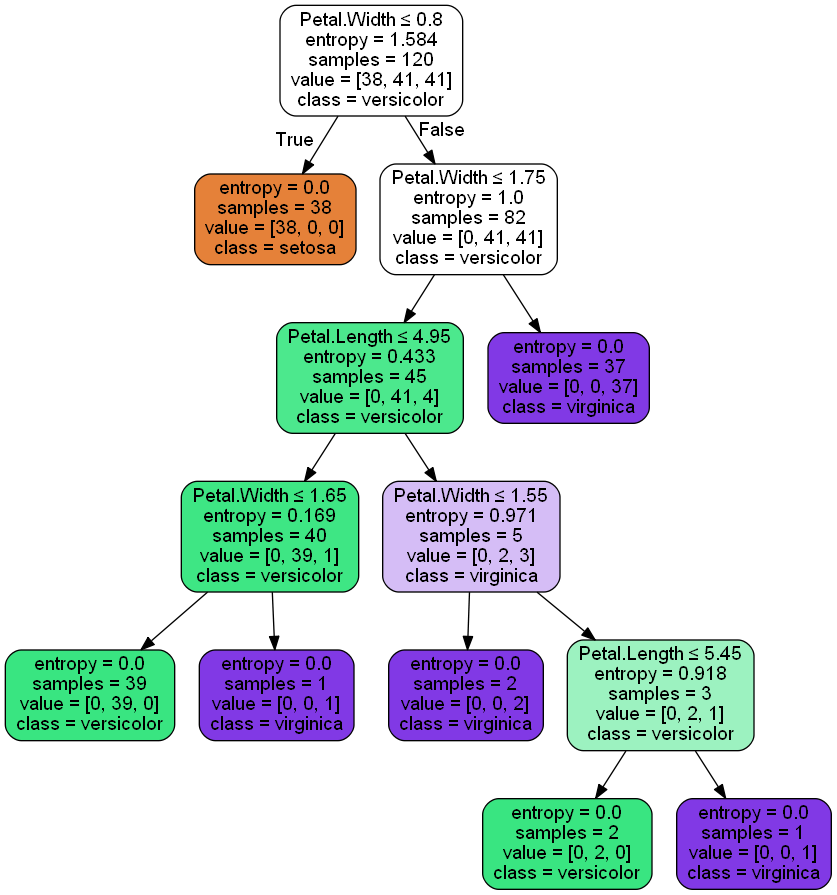

In [5]:
#Step4. Visualize the decision tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.core.display import Image

# Set graphviz path
import os
os.environ["PATH"] += os.pathsep + 'B:/graphviz-2.38/release/bin/'

dot_data = StringIO()
export_graphviz(iris_tree, out_file=dot_data, filled=True,
               feature_names=iris.columns[:4],
               class_names=iris['Species'].unique(),
               rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [5]:
# Step5. Calculate precision, recall and f1-score  

from sklearn.metrics import classification_report

print("Validation of the result of training set data using decision tree：")
print(classification_report(y_test, iris_tree.predict(x_test)))
print(53*"-")

print("Validation of the result of all data using decision tree：")
print(classification_report(y, iris_tree.predict(x)))

Validation of the result of training set data using decision tree：
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       0.89      0.89      0.89         9
  virginica       0.89      0.89      0.89         9

avg / total       0.93      0.93      0.93        30

-----------------------------------------------------
Validation of the result of all data using decision tree：
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.98      0.98      0.98        50
  virginica       0.98      0.98      0.98        50

avg / total       0.99      0.99      0.99       150



In [6]:
# Step6. 5-fold cross validation

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(iris_tree, x, y, cv=5)
cross = pd.DataFrame(scores)
cross.columns = ['Validation result']
cross.T

,0,1,2,3,4
Validation result,0.966667,0.966667,0.9,0.933333,1.0
